aa

# Question 2 - Generating n by n Matrix

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Generate n by n matrix with every element is in range of (-1,1)
def generateMat(n):
    A = np.random.uniform(-1,1,(n,n))
    return A

Testing generating matrices

CASE 1: 3 by 3 matrix

In [4]:
generateMat(3)

array([[-0.35217051,  0.06671598,  0.3341366 ],
       [ 0.54475309,  0.395486  ,  0.72950413],
       [ 0.07743546,  0.45017551, -0.5267796 ]])

CASE 2: 5 by 5 matrix

In [5]:
generateMat(5)

array([[-0.51343496, -0.74089094, -0.462304  ,  0.30923285, -0.1830017 ],
       [ 0.34769666, -0.39601918, -0.20335511, -0.1913022 ,  0.79114358],
       [ 0.97358905,  0.47458669, -0.21171705, -0.98665766,  0.37749496],
       [ 0.43621089, -0.49869412,  0.7510291 ,  0.63877382,  0.61104159],
       [ 0.56634639, -0.10883978,  0.85100642,  0.95672691, -0.98818263]])

# Question 3 - Implementing Gaussian Elimination with partial pivoting

In [6]:
#Gaussian Elimination with partial pivoting
def GEPP(B):
    n = len(B)
    # Do this for all k, k in 0 to n-1
    for k in range (0,n-1):
        #k-th pivot
        ##print ("%sth row pivot" % k)
        max = abs(B[k][k])
        j = k
        for i in range (k+1,n):
            if (max < abs(B[i][k])):
                max = abs(B[i][k])
                j = i
        #swap rows
        if (k!=j):
            ##print ("%sth row is swapped" % j)
            B[[j,k]]=B[[k,j]]
        ##else:
            ##print ("no swapping is done")
        ##for b in range(0,n):
            ##print(B[b])
        #elimination
        ## print ("elimination")
        for i in range (k+1,n):
            m = B[i][k]/B[k][k]
            for j in range (k+1,n):
                B[i][j] = B[i][j]-B[k][j]*m
            B[i][k] = 0

In [7]:
#Print matrix
def printMat(A):
    n = len(A)
    for b in range(0,n):
        print(A[b])

Testing Gaussian Elimination of n by n matrices

CASE 1: n = 4

In [8]:
#Generate 4 by 4 matrix
n = 4
print('%d by %d Matrix A is' % (n, n))
A=generateMat(n)
printMat(A)
#Apply GEPP to A
print('After applying GEPP to A')
GEPP(A)
printMat(A)

4 by 4 Matrix A is
[ 0.86605977 -0.83461152  0.40489755 -0.55920602]
[-0.26474798 -0.81822045  0.36314753  0.24941384]
[ 0.40083039 -0.32222245  0.68764603 -0.22190574]
[-0.13219958  0.64330425  0.29365452 -0.14788108]
After applying GEPP to A
[ 0.86605977 -0.83461152  0.40489755 -0.55920602]
[ 0.         -1.07335493  0.48692168  0.07846875]
[ 0.          0.          0.58949761 -0.19552522]
[0.         0.         0.         0.21715063]


CASE 2: n = 7

In [9]:
#Generate 7 by 7 matrix
n = 7
print('%d by %d Matrix A is' % (n, n))
A=generateMat(n)
printMat(A)
#Apply GEPP to A
print('After applying GEPP to A')
GEPP(A)
printMat(A)

7 by 7 Matrix A is
[ 0.9949938  -0.35024286 -0.49948092  0.47701463  0.71363159 -0.02201033
  0.17883974]
[-0.08271569  0.480117    0.01373549  0.61801228  0.39701598  0.54459995
 -0.74837618]
[-0.1356872  -0.9186219   0.38873558  0.23458262 -0.89504736 -0.09002297
 -0.57076522]
[ 0.69094223  0.57424822 -0.48666642 -0.75185702 -0.18637682  0.28580554
  0.76758122]
[ 0.120364    0.0501803  -0.8047393   0.6609558   0.25902507  0.87654441
  0.95408234]
[ 0.06386115 -0.9691012  -0.14046836 -0.67727821 -0.42850793 -0.43143699
  0.99143038]
[ 0.39360287  0.74313634 -0.40331147  0.21531543  0.60952049  0.06218279
 -0.36231473]
After applying GEPP to A
[ 0.9949938  -0.35024286 -0.49948092  0.47701463  0.71363159 -0.02201033
  0.17883974]
[ 0.         -0.96638448  0.32062142  0.29963306 -0.7977295  -0.09302451
 -0.54637687]
[ 0.          0.         -0.71361192  0.6319469   0.09630012  0.87029819
  0.88012256]
[ 0.          0.          0.         -1.37552718  0.2500933  -0.85413925
  0.99410204]

# Question 4 - Plotting growth factor vs matrix size

Given the factorization $PA=LU$, the growth factor is defined as
$$ g(A)= \frac{max_{i,j}|u_{ij}|}{max_{i,j}|a_{ij}|} $$
where $ u_{ij}$ and $a_{ij}$ are the elements of $U$ and $A$ respectively.

To calculate $g(A)$ we first need to generate a matrix. Inspect every abosulte value of elements and find ${max_{i,j}|a_{ij}|}$.
Then, apply Gaussian elimination. Now, we can find ${max_{i,j}|u_{ij}|}$ and apply it on $\frac{max_{i,j}|u_{ij}|}{max_{i,j}|a_{ij}|}$ to find $g(A)$

In [10]:
#Growth Factor function with parameter n
def growF(n):
    B = generateMat(n)
    a = abs(B).max()
    GEPP(B)
    u = abs(B).max()
    g = u/a
    return g

Example: Find a growth factor of a 4 by 4 matrix

In [11]:
growF(4)

1.228919987527421

Now, we are going to plot growth factor vs matrix size.

The x-axis represents the matrix size n

The y-axis represents the growth facor of a n by n matrix in logarithmic scale

In [36]:
x = np.arange(10,1000,10)
y = []
for k in range(10,1000,10):
    y.append(growF(k))
plt.plot(x,np.log(y))
plt.xlabel('matrix size n')
plt.ylabel('log (Growth Factor)')
plt.show()

KeyboardInterrupt: 

If $g{\approx}cn^\alpha$, then $$\log(g){\approx}\log(cn^\alpha)=\log(c)+\alpha \log(n)=C+\alpha \log(n)$$

So, $\alpha$ is the slope of $\log(g)$ vs $\log(n)$ plot.

Now, plot $\log(g)$ vs $\log(n)$ to find a approximated $\alpha$

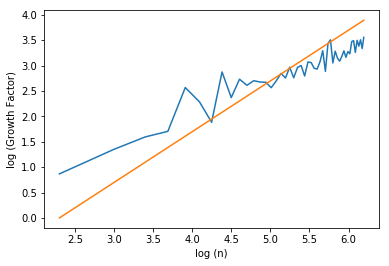

In [24]:
x = np.arange(10,500,10)
z = np.log(x)
y = []
for k in range(10,500,10):
    y.append(growF(k))
plt.plot(z,np.log(y))
plt.plot(z,z-np.log(10))
plt.xlabel('log (n)')
plt.ylabel('log (Growth Factor)')
plt.show()

We clearly see that $\alpha$ is less than 1.

So, $cn^\alpha<cn$.
Compare this with the worst case scenario $g{\approx}2^n$, since $n<2^n$ we see this estimation is better.

# Question 5 - Probability distribution of the growth factor for a fixed n

CASE 1 : n = 10

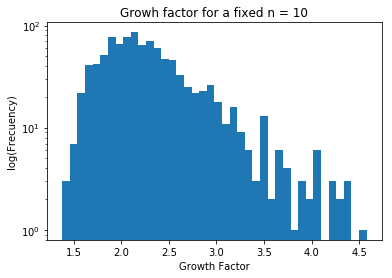

In [13]:
n = 10
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 10')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

Case 2 : n = 16

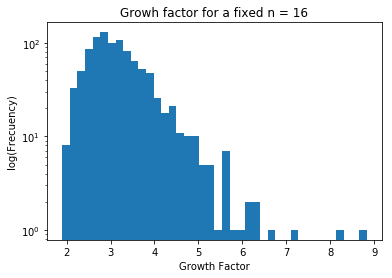

In [14]:
n = 16
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 16')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

Case 3 : n = 20, 40, 80

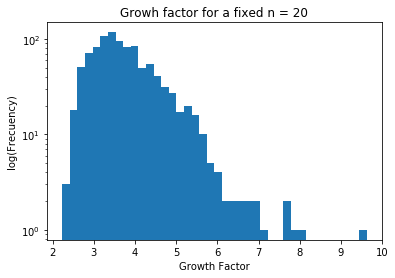

In [15]:
n = 20
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 20')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

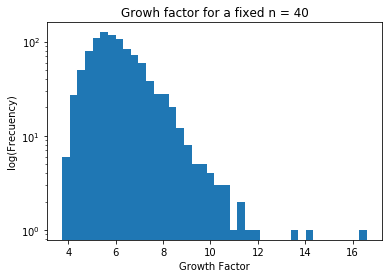

In [ ]:
n = 40
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 40')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

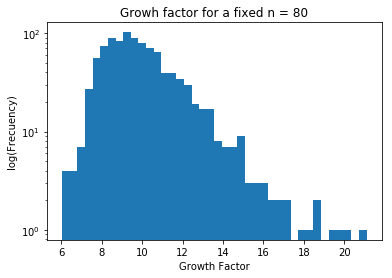

In [37]:
n = 80
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 80')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

The plot generally follows a right skewed standard deviation plot.
Changing n, size of matrix doesn't really affect the shape of plot, but it affects the spread of growth factor.
For n = 10, the growth factor ranges from 1.5 to 4.5, while for n = 40, the growth factor ranges from 4 to 16.
From this experiment, we can deduce that increasing size of matrix not only increases growth factor, but also increases range of growth factors.

# Question 6 - Repeat Q4, 5 for matrices whose entries are random numbers with a normal distribution

I picked the parameters ($\mu$ and $\sigma$) at my convenience.
$\mu = 3$ and $\sigma^2 =1$

In [26]:
mu = 3
sigma = 1
def newGenerateMat(n):
    A = np.random.normal(mu,sigma,(n,n))
    return A

Test generating matrix with above entries.

Case : $n = 5$

In [27]:
newGenerateMat(5)

array([[3.60702066, 4.12412549, 1.90820881, 4.42113217, 5.14641438],
       [3.15032748, 2.29770698, 4.93074458, 2.76351201, 1.41389187],
       [3.03545302, 3.54667478, 3.62208976, 3.90633076, 2.63030007],
       [2.38657748, 2.57274829, 2.89373873, 4.49202398, 4.87053026],
       [2.55253375, 4.42659184, 2.43976921, 5.10087916, 1.46944917]])

In [28]:
#Growth Factor function with parameter n
def newGrowF(n):
    B = newGenerateMat(n)
    a = abs(B).max()
    GEPP(B)
    u = abs(B).max()
    g = u/a
    return g

In [29]:
newGrowF(4)

1.0

# Plotting growth factor vs matrix size

In [ ]:
x = np.arange(10,200,10)
z = np.log(x)
y = []
for k in range(10,200,10):
    y.append(newGrowF(k))
plt.plot(z,np.log(y))
plt.plot(z,z)
plt.xlabel('log (n)')
plt.ylabel('log (Growth Factor)')
plt.show()

# Plotting Histogram

CASE : $n = 10, 16, 20, 40, 80$

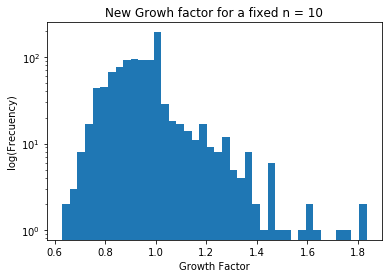

In [30]:
n = 10
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 10')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

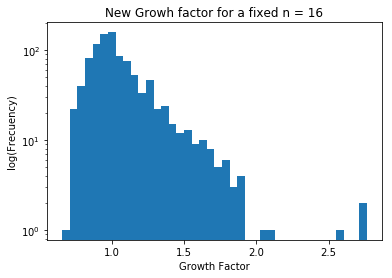

In [31]:
n = 16
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 16')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

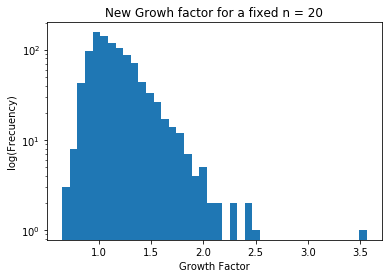

In [32]:
n = 20
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 20')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

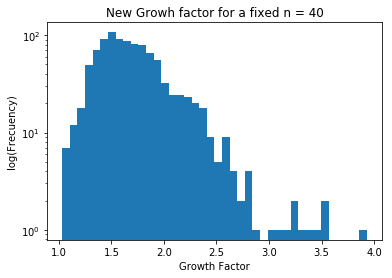

In [33]:
n = 40
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 40')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

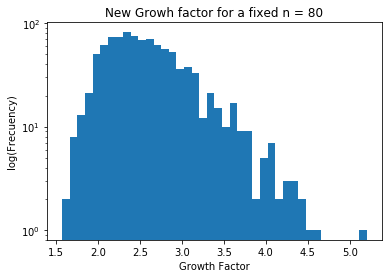

In [35]:
n = 80
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 80')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

The plot generally follows a right skewed standard deviation plot. Just like previous case, changing n, size of matrix doesn't really affect the shape of plot, but it affects the spread of growth factor.
For n = 10, the growth factor ranges from 0.6 to 1.8 while for n = 40, the growth factor ranges from 1.5 to 5.

Another interesing point can be found when comparing this plot with the one with uniformly distributed entries.
If we look at the range of growth factor for two plots, plot with uniformly distributed entries has wider range for fixed n. 

From above, we can deduce that the distribution of entries can also affect value and range of growth factor.

To see how the spread of entries can affect the growth factor, we are going to change $\mu$ and $\sigma$.

This time, we are going to take $\mu = 3$ and $\sigma = 10$

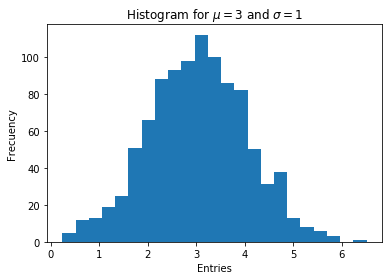

In [62]:
y = np.random.normal(3,1,1000)
plt.hist(y ,bins='auto')
plt.title('Histogram for $\mu = 3$ and $\sigma = 1$')
plt.xlabel('Entries')
plt.ylabel('Frecuency')
plt.show()

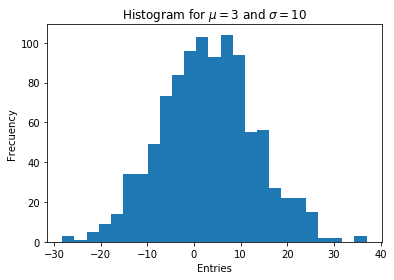

In [63]:
y = np.random.normal(3,10,1000)
plt.hist(y ,bins='auto')
plt.title('Histogram for $\mu = 3$ and $\sigma = 10$')
plt.xlabel('Entries')
plt.ylabel('Frecuency')
plt.show()

As we observe from above two histograms, changing the variance of a normally distributed entry doesn't affect the general shape of plots. However, the second plot with larger variance has larger range for entries, which means that the entries are more spread for larger variance. 

In [59]:
mu = 3
sigma = 10

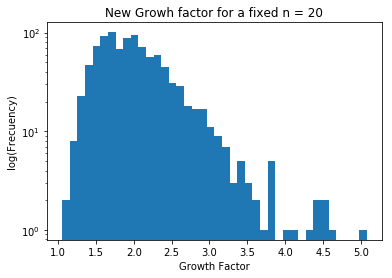

In [60]:
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 20')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

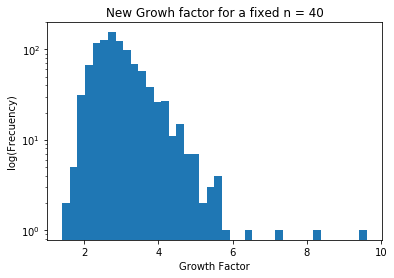

In [61]:
n = 40
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 40')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

Above two plots are result for the new distributed entries with $\mu = 3$ and $\sigma = 10$. If we compare each plot with corresponding plot made by entries with $\mu = 3$ and $\sigma = 1$, we can clearly see the growth factor is more spread for above two. For $n=20$, the range of growth factor is 1 to 5 for $\sigma = 10$ while it is 0.5 to 3.5 for $\sigma = 1$. Also, the range of growth factor is 1 to 10 for $\sigma = 10$ while it is 1 to 4 for $\sigma = 1$ for $n=40$. Thus, we can conclude that if entries are more spread (i.e, the range of entries are larger), the growth factor is larger and the range that growth factor can take is also larger.